In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

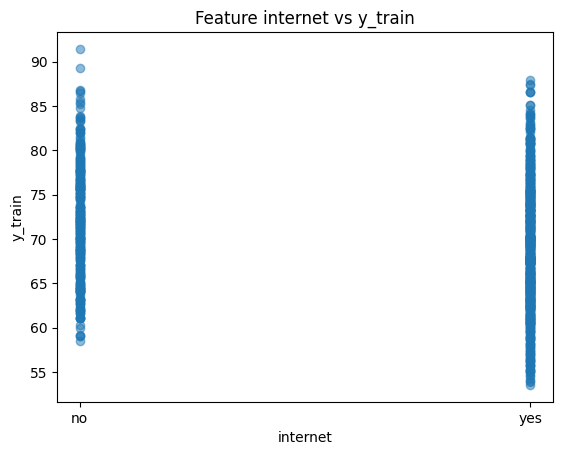

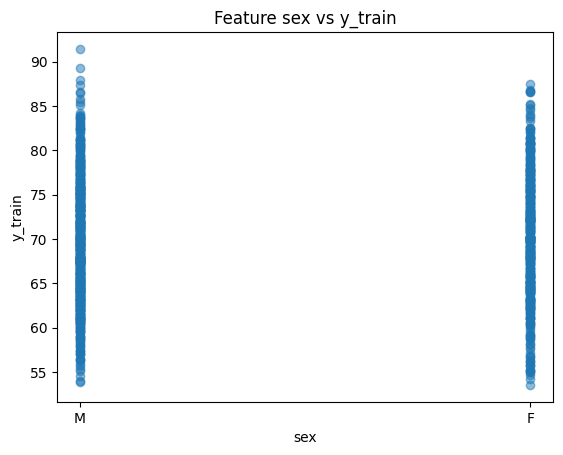

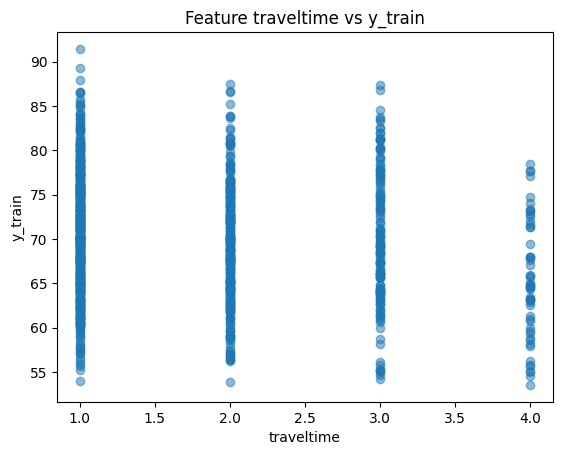

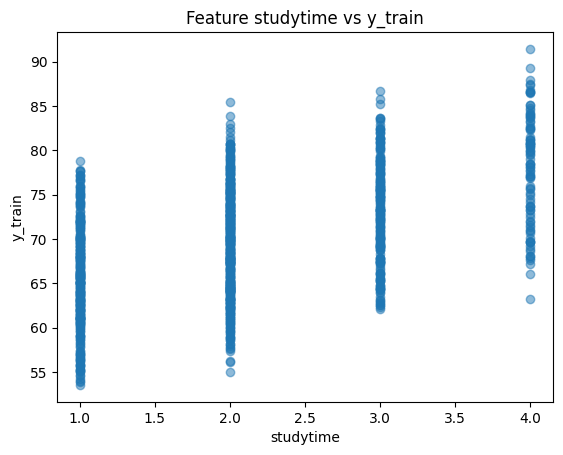

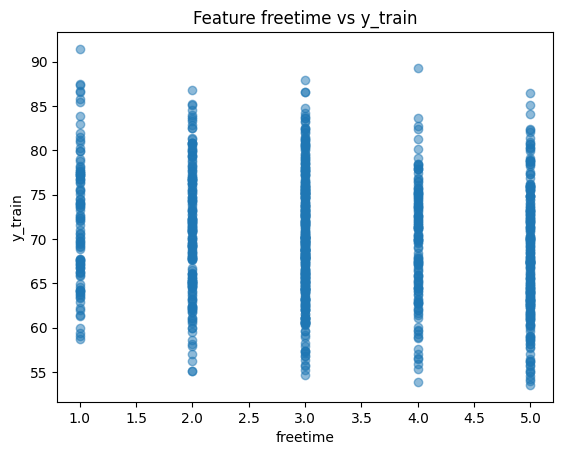

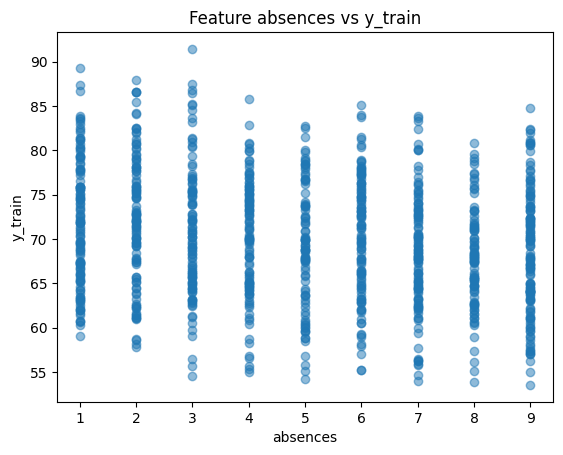

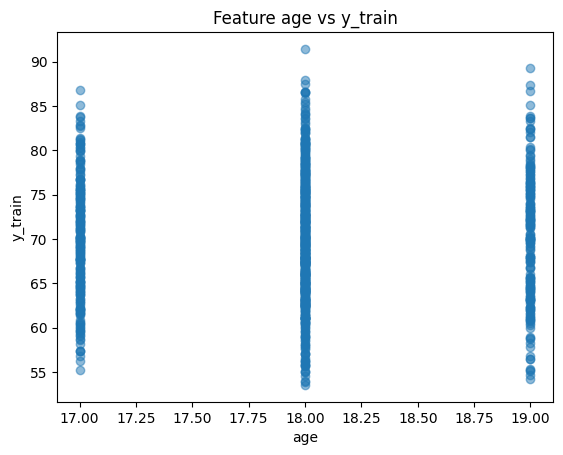

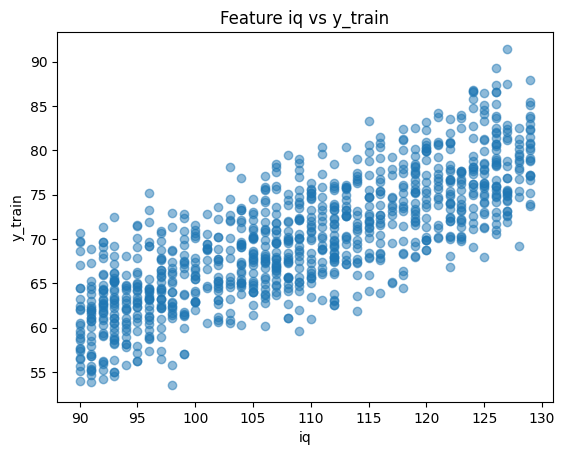

In [2]:
# Use the file namd 'training data' to train the model
data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
def plot_features(data, x_train, y_train):
    for i in range(x_train.shape[1]):
        plt.figure()
        plt.scatter(x_train[:, i], y_train, alpha=0.5)
        plt.title(f"Feature {data.columns[i]} vs y_train")
        plt.xlabel(data.columns[i])
        plt.ylabel('y_train')
        plt.show()
plot_features(data, x_train, y_train)
# To get an idea whether to add some features or not
# Add some features if required in x_train

In [3]:
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
from sklearn.preprocessing import LabelEncoder
def feature_changing(x_train):
    # Convert x_train back to DataFrame for easier handling of columns
    x_train_df = pd.DataFrame(x_train, columns=data.columns[0:8])

    le = LabelEncoder()
    columns_to_encode = ['sex', 'internet']  # Specify the columns you want to encode

    for column in columns_to_encode:
        if column in x_train_df.columns and x_train_df[column].dtype == 'object':
            x_train_df[column] = le.fit_transform(x_train_df[column])
    
    # Convert x_train_df back to numpy array
    x_train = x_train_df.values

    return x_train

x_train = feature_changing(x_train)
print(x_train)

[[0 1 2 ... 6 18 118]
 [1 1 2 ... 7 19 107]
 [1 1 3 ... 5 18 108]
 ...
 [1 1 2 ... 5 17 123]
 [1 0 1 ... 8 17 104]
 [1 1 1 ... 6 18 128]]


In [4]:
def z_score(x_train):
  # ---------
    # write the code for feature scaling here
    # Your code here
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
  # ---------
    return x_train,x_std,x_mean

In [5]:
def cost(x_train,y_train,w,b):
  # ---------
    # Your code here
    # Use mean square error as cost function
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)
    # return cost
  # ---------
    return loss

In [6]:
def gradient_descent(x_train,y_train,w,b):
    num_itertations = 1000
    learning_rate = 0.01
  # ---------
    # Your code here
    # Choose learning rate yourself
    m = x_train.shape[0]
    for i in range(num_itertations):
        predictions = np.dot(x_train, w) + b
        dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))
        db = (1 / m) * np.sum(predictions - y_train)
        w = w - learning_rate * dw
        b = b - learning_rate * db
  # ---------

    return w,b

In [7]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

In [8]:
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
